In [1]:
import convexgating as cg
import scanpy as sc
import convexgating as cg
import anndata as ann
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import os
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
base_path = os.getcwd()
pre = 'rev07_NatComm'

In [2]:
base_save_path_rev06 = 'C:\\Users\\vfriedrich\\projects\\gating\\revision\\NatComm\\rev06_NatComm'
base_save_path_rev07 = 'C:\\Users\\vfriedrich\\projects\\gating\\revision\\NatComm\\rev07_NatComm'

In [6]:
df_results_lvl2 = pd.read_csv(os.path.join(base_save_path_rev06,"rev06_marker_selection_benchmark_oetjen_lvl2.csv"))
df_results_lvl3 = pd.read_csv(os.path.join(base_save_path_rev06,"rev06_marker_selection_benchmark_oetjen_lvl3.csv"))
df_results_lvl4 = pd.read_csv(os.path.join(base_save_path_rev06,"rev06_marker_selection_benchmark_oetjen_lvl4.csv"))

In [10]:
def plot_time_boxplots(df):
    plt.figure(figsize=(8, 6))
    df.boxplot(column=['heuristic_time', 'tree_time', 'svm_time'])
    plt.title('Boxplot of Time for Different Methods')
    plt.ylabel('Time (seconds)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [25]:
summary_stats = {}

# Loop through each level and compute mean and median
for level_name, df in [('lvl2', df_results_lvl2), ('lvl3', df_results_lvl3), ('lvl4', df_results_lvl4)]:
    stats = {
        #'heuristic_time_mean': np.mean(df['heuristic_time']),
        'heuristic_time_median': np.median(df['heuristic_time']),
        #'tree_time_mean': np.mean(df['tree_time']),
        'tree_time_median': np.median(df['tree_time']),
        #'svm_time_mean': np.mean(df['svm_time']),
        'svm_time_median': np.median(df['svm_time']),
    }
    summary_stats[level_name] = stats

# Convert the dictionary into a DataFrame for better display
summary_df_median = pd.DataFrame(summary_stats).T

In [21]:
summary_stats = {}

# Loop through each level and compute mean and median
for level_name, df in [('lvl2', df_results_lvl2), ('lvl3', df_results_lvl3), ('lvl4', df_results_lvl4)]:
    stats = {
        'heuristic_time_mean': np.mean(df['heuristic_time']),
        #'heuristic_time_median': np.median(df['heuristic_time']),
        'tree_time_mean': np.mean(df['tree_time']),
        #'tree_time_median': np.median(df['tree_time']),
        'svm_time_mean': np.mean(df['svm_time']),
        #'svm_time_median': np.median(df['svm_time']),
    }
    summary_stats[level_name] = stats

# Convert the dictionary into a DataFrame for better display
summary_df_mean = pd.DataFrame(summary_stats).T

In [28]:
os.path.join(base_save_path_rev07, 'rev07_summary_df_median.csv')

'C:\\Users\\vfriedrich\\projects\\gating\\revision\\NatComm\\rev07_NatComm\\rev07_summary_df_median.csv'

In [32]:
summary_df_median

,heuristic_time_median,tree_time_median,svm_time_median
lvl2,0.147839,0.401802,11.616697
lvl3,0.179860,0.633356,20.305108
lvl4,0.326566,1.229722,40.508548


In [29]:
summary_df_median.to_csv(os.path.join(base_save_path_rev07, 'rev07_summary_df_median.csv'))

In [31]:
summary_df_mean

,heuristic_time_mean,tree_time_mean,svm_time_mean
lvl2,0.176894,0.503602,12.599326
lvl3,0.263983,0.681460,19.688812
lvl4,0.359896,1.281416,821.290124


In [34]:
np.median(df_results_lvl2['heuristic_svm_corr'])

0.6809778456837281

In [35]:
np.median(df_results_lvl3['heuristic_svm_corr'])

0.6285714285714286

In [36]:
np.median(df_results_lvl4['heuristic_svm_corr'])

0.5735676088617265

In [30]:
summary_df_mean.to_csv(os.path.join(base_save_path_rev07, 'rev07_summary_df_mean.csv'))

In [13]:
np.mean(df_results_lvl4['heuristic_time'])

0.3598964810371399

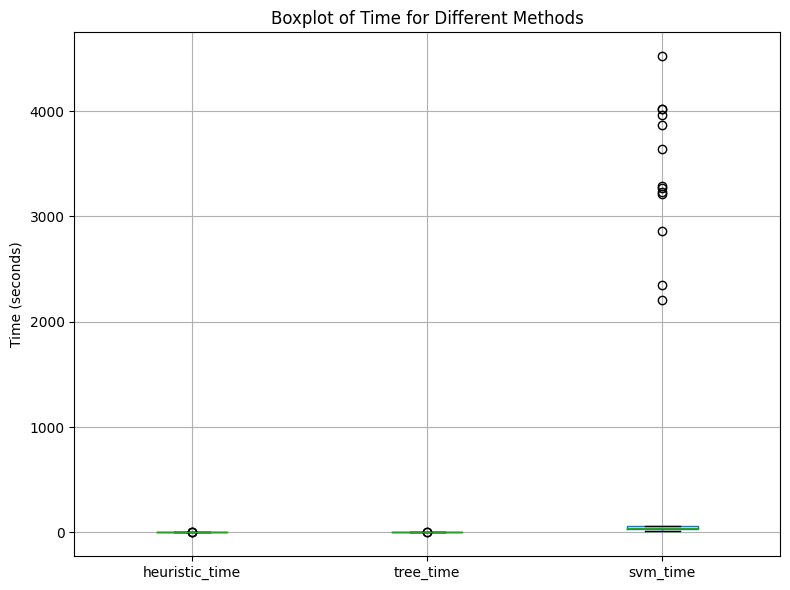

In [16]:
plot_time_boxplots(df_results_lvl4)

In [44]:
np.random.randint(1, 5, 1)[0]

4

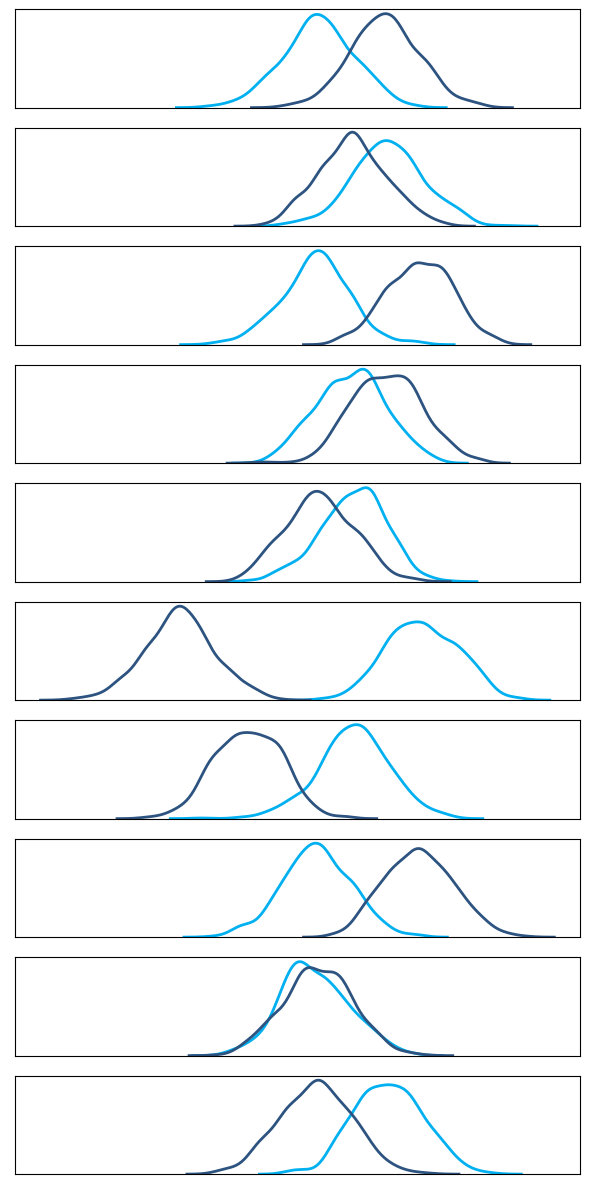

In [60]:
num_plots = 10
samples_per_group = 500
color_target = "#1f77b4"  # consistent color for all distributions

# Seed for reproducibility
np.random.seed(0)

# Generate synthetic data
data_pairs = []

for i in range(num_plots):
    target = np.random.normal(loc=np.random.randint(1, 5, 1)[0], scale=1, size=samples_per_group)
    
    if i in [5, 6]:  # Marker 6 and 7 (most different)
        non_target = np.random.normal(loc=np.random.randint(-4, 1, 1)[0], scale=1, size=samples_per_group)
    else:
        # Vary non-target to be closer to target, but still different
        shift = np.random.uniform(4.0, 5.0)
        non_target = np.random.normal(loc=np.random.randint(1, 5, 1)[0], scale=1, size=samples_per_group)

    data_pairs.append((target, non_target))

# Create subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(6, 1.2* num_plots), sharex=True)

for i, (target, non_target) in enumerate(data_pairs):
    ax = axes[i]
    sns.kdeplot(target, ax=ax, color='#00b0f0ff', linewidth=2)
    sns.kdeplot(non_target, ax=ax, color='#2d5380ff', linestyle="-", linewidth=2)

    # Remove ticks and labels
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_ylabel("")
    ax.set_xlabel("")
    
    # Title with marker index
    #ax.set_title(f"marker {i+1}", fontsize=10, loc="left")

plt.tight_layout()
plt.show()

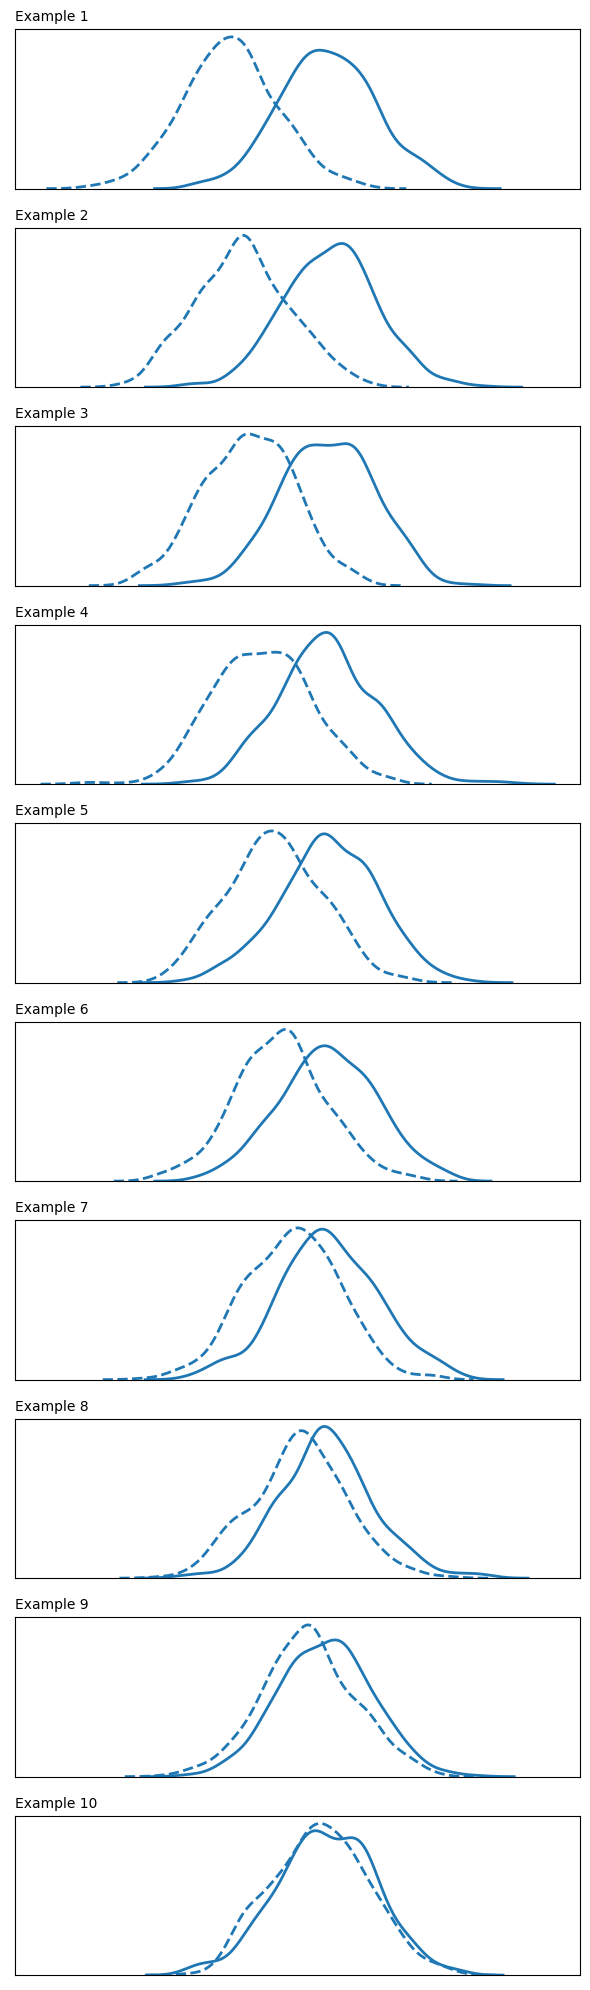

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Settings
num_plots = 10
samples_per_group = 500
color_target = "#1f77b4"  # consistent color for all distributions

# Generate synthetic data for 10 examples
np.random.seed(0)
data_pairs = [
    (
        np.random.normal(loc=5, scale=1, size=samples_per_group),           # Target
        np.random.normal(loc=3 + i * 0.2, scale=1, size=samples_per_group)  # Non-target
    )
    for i in range(num_plots)
]

# Create subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(6, 2 * num_plots), sharex=True)

for i, (target, non_target) in enumerate(data_pairs):
    ax = axes[i]
    sns.kdeplot(target, ax=ax, color=color_target, linewidth=2)
    sns.kdeplot(non_target, ax=ax, color=color_target, linestyle="--", linewidth=2)
    
    # Remove ticks and labels
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_ylabel("")
    ax.set_xlabel("")
    
    # Optional: add simple titles to each plot
    ax.set_title(f"Example {i+1}", fontsize=10, loc="left")

plt.tight_layout()
plt.show()

In [9]:
df_results_lvl4

,level,celltype,sample,heuristic_time,tree_time,svm_time,heuristic_tree_corr,heuristic_svm_corr,tree_svm_corr,iou_heuristic_tree,iou_heuristic_svm,iou_tree_svm
0,cell_type_lvl4,CCR7+ CD4+ T cell,T,0.422586,1.273241,19.222961,0.289997,0.644309,0.530744,0.250000,0.428571,0.538462
1,cell_type_lvl4,CCR7- CD4+ T cell,T,0.800282,0.725846,23.277287,0.448857,0.357372,0.453555,0.333333,0.176471,0.428571
2,cell_type_lvl4,NK cell,T,0.181487,0.604254,16.558507,-0.025021,0.570053,-0.081240,0.250000,0.428571,0.176471
3,cell_type_lvl4,Double positive T cell,T,0.149000,0.558187,21.949974,0.404443,0.607028,0.288139,0.333333,0.538462,0.250000
4,cell_type_lvl4,Double negative T cell,T,0.173429,0.577987,22.625468,0.186755,0.370817,0.382974,0.176471,0.333333,0.250000
5,cell_type_lvl4,CCR7+ CD8+ T cell,T,0.159765,0.583366,19.144721,-0.252985,0.486325,0.083201,0.176471,0.428571,0.250000
6,cell_type_lvl4,CCR7- CD8+ T cell,T,0.152828,0.620347,2204.776264,0.352007,0.607334,0.731495,0.250000,0.428571,0.666667
7,cell_type_lvl4,CCR7+ CD4+ T cell,U,1.126599,5.287271,3959.653100,0.523300,0.768984,0.765317,0.333333,0.333333,1.000000
8,cell_type_lvl4,CCR7- CD8+ T cell,U,0.129214,0.430255,42.043531,0.321605,0.577082,0.222910,0.333333,0.538462,0.250000
9,cell_type_lvl4,CCR7+ CD8+ T cell,U,0.451509,1.756354,4015.394274,0.125219,0.368678,0.348174,0.250000,0.250000,0.250000
